# Starting/Ending Stations on GMaps Using API

In [38]:
import pandas as pd
import hvplot.pandas
import gmaps
import gmaps.datasets
import gmaps.geojson_geometries
import matplotlib.pyplot as plt


from hina_config import google_key

# Configure Google Maps API with your API key
gmaps.configure(api_key=google_key)

In [2]:
# # Read in 2021 dataframe
# csv_path = "/Users/hinaahmad/ClassRepository__2023/project_1_repo/2021_CLEAN_DATA/all_2021_data.csv"
# all_2021_df = pd.read_csv(csv_path, low_memory=False)
# all_2021_df.head()

In [3]:
# # Read in 2022 dataframe
# csv_path = "/Users/hinaahmad/ClassRepository__2023/project_1_repo/2022_CLEAN_DATA/all_2021_data.csv"
# all_2022_df = pd.read_csv(csv_path, low_memory=False)
# all_2022_df.head()

Filter the csv file containing Weekday data from 6am to 6pm 

In [4]:
# Read weekday_2021_data
csv_path = "/Users/hinaahmad/ClassRepository__2023/project_1_repo/2021_Weekday_Data_6to6/weekday_2021_data.csv"
weekday_2021_data_df = pd.read_csv(csv_path, low_memory=False)
weekday_2021_data_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day Type,Month,Duration,Start Time,End Time,Day of Week,Year
0,EF1237396C1D2DF4,electric_bike,2021-11-15,2021-11-15,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Weekday,Nov,460,09:40 AM,09:48 AM,Monday,2021
1,4CA89455176FD912,classic_bike,2021-11-23,2021-11-23,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Weekday,Nov,274,04:57 PM,05:02 PM,Tuesday,2021
2,3E632C5C54A1485C,classic_bike,2021-11-29,2021-11-29,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Weekday,Nov,1427,09:27 AM,09:51 AM,Monday,2021
3,9ED25F0388AC6226,classic_bike,2021-11-09,2021-11-09,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Weekday,Nov,254,05:47 PM,05:51 PM,Tuesday,2021
4,3BF46E8C8FB64B36,classic_bike,2021-11-04,2021-11-04,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Weekday,Nov,228,04:17 PM,04:21 PM,Thursday,2021


In [5]:
# Read weekday_2022_data
csv_path = "/Users/hinaahmad/ClassRepository__2023/project_1_repo/2022_Weekday_data_6to6/weekday_2022_data.csv"
weekday_2022_data_df = pd.read_csv(csv_path, low_memory=False)
weekday_2022_data_df.head()

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day Type,Month,Duration,Start Time,End Time,Day of Week,Year
0,C40CF15D0DBE584E,classic_bike,2022-09-23,2022-09-24,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Weekday,Sep,49484,06:42 PM,08:27 AM,Friday,2022
1,A9E14A3286BB0922,classic_bike,2022-09-16,2022-09-16,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Weekday,Sep,269,05:04 PM,05:08 PM,Friday,2022
2,7B99FCADC829EAC0,classic_bike,2022-09-13,2022-09-14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Weekday,Sep,2642,11:51 PM,12:35 AM,Tuesday,2022
3,CCBA4E0E3416BCBB,classic_bike,2022-09-14,2022-09-14,Maine Ave & 9th St SW,31646.0,Maine Ave & 9th St SW,31646.0,38.880440,-77.025236,38.880440,-77.025236,casual,Weekday,Sep,3642,12:14 PM,01:15 PM,Wednesday,2022
4,043A701E69CEBCAF,electric_bike,2022-09-06,2022-09-06,Maine Ave & 9th St SW,31646.0,NaN,NaN,38.880388,-77.025263,38.880000,-76.980000,member,Weekday,Sep,1063,05:12 PM,05:30 PM,Tuesday,2022


In [6]:
# Filter rows for weekday_2021_data that contain both Starting Station and Ending Station
filtered_2021_df = weekday_2021_data_df.dropna(subset=['Start Station', 'End Station', 'Starting Lat', 'Starting Lng', 'Ending Lat', 'Ending Lng'])
# Display the filtered dataframe

filtered_2021_df

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day Type,Month,Duration,Start Time,End Time,Day of Week,Year
0,EF1237396C1D2DF4,electric_bike,2021-11-15,2021-11-15,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Weekday,Nov,460,09:40 AM,09:48 AM,Monday,2021
1,4CA89455176FD912,classic_bike,2021-11-23,2021-11-23,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Weekday,Nov,274,04:57 PM,05:02 PM,Tuesday,2021
2,3E632C5C54A1485C,classic_bike,2021-11-29,2021-11-29,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Weekday,Nov,1427,09:27 AM,09:51 AM,Monday,2021
3,9ED25F0388AC6226,classic_bike,2021-11-09,2021-11-09,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Weekday,Nov,254,05:47 PM,05:51 PM,Tuesday,2021
4,3BF46E8C8FB64B36,classic_bike,2021-11-04,2021-11-04,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Weekday,Nov,228,04:17 PM,04:21 PM,Thursday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429727,2B21BFBF78A425BA,electric_bike,2021-12-24,2021-12-24,10th & Florida Ave NW,31120.0,14th & Irving St NW,31124.0,38.920388,-77.025661,38.928552,-77.032224,member,Weekday,Dec,407,01:10 PM,01:17 PM,Friday,2021
2429728,F772A09D50D1451E,docked_bike,2021-12-15,2021-12-15,M St & Pennsylvania Ave NW,31246.0,15th St & Pennsylvania Ave NW,31129.0,38.905126,-77.056887,38.896465,-77.033381,casual,Weekday,Dec,8531,02:58 PM,05:20 PM,Wednesday,2021
2429729,C7BD80A82EBBC1FB,classic_bike,2021-12-15,2021-12-15,22nd & P ST NW,31285.0,Virginia Ave & 25th St NW,31297.0,38.909394,-77.048728,38.899500,-77.054155,member,Weekday,Dec,384,07:50 AM,07:56 AM,Wednesday,2021
2429730,95957793A0807E8B,classic_bike,2021-12-06,2021-12-06,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member,Weekday,Dec,701,02:17 PM,02:29 PM,Monday,2021


In [7]:
# Filter rows for weekday_2022_data that contain both Starting Station and Ending Station
filtered_2022_df = weekday_2022_data_df.dropna(subset=['Start Station', 'End Station', 'Starting Lat', 'Starting Lng', 'Ending Lat', 'Ending Lng'])
# Display the filtered dataframe

filtered_2022_df

,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day Type,Month,Duration,Start Time,End Time,Day of Week,Year
0,C40CF15D0DBE584E,classic_bike,2022-09-23,2022-09-24,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member,Weekday,Sep,49484,06:42 PM,08:27 AM,Friday,2022
1,A9E14A3286BB0922,classic_bike,2022-09-16,2022-09-16,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member,Weekday,Sep,269,05:04 PM,05:08 PM,Friday,2022
2,7B99FCADC829EAC0,classic_bike,2022-09-13,2022-09-14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual,Weekday,Sep,2642,11:51 PM,12:35 AM,Tuesday,2022
3,CCBA4E0E3416BCBB,classic_bike,2022-09-14,2022-09-14,Maine Ave & 9th St SW,31646.0,Maine Ave & 9th St SW,31646.0,38.880440,-77.025236,38.880440,-77.025236,casual,Weekday,Sep,3642,12:14 PM,01:15 PM,Wednesday,2022
5,18A66E46852DABC1,classic_bike,2022-09-26,2022-09-26,Columbia Pike & S Walter Reed Dr,31067.0,Columbia Pike & S Walter Reed Dr,31067.0,38.862478,-77.086599,38.862478,-77.086599,member,Weekday,Sep,41,07:44 AM,07:44 AM,Monday,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590414,8E351C93662527BF,classic_bike,2022-05-23,2022-05-23,USDA / 12th & C St SW,31217.0,1st & H St NW,31638.0,38.886277,-77.028242,38.900358,-77.012108,member,Weekday,May,1593,12:38 PM,01:05 PM,Monday,2022
1590415,7861B4AD0FC4EB7B,classic_bike,2022-05-13,2022-05-13,4th St & Madison Dr NW,31288.0,5th St & Massachusetts Ave NW,31265.0,38.890496,-77.017246,38.900930,-77.018677,casual,Weekday,May,979,05:22 PM,05:38 PM,Friday,2022
1590416,D7B7E76050E33983,classic_bike,2022-05-25,2022-05-25,4th St & Madison Dr NW,31288.0,1st & H St NW,31638.0,38.890496,-77.017246,38.900358,-77.012108,member,Weekday,May,715,05:21 PM,05:33 PM,Wednesday,2022
1590417,67E741F530DD586C,electric_bike,2022-05-02,2022-05-02,North Capitol St & F St NW,31624.0,Hamlin & 7th St NE,31514.0,38.897424,-77.009831,38.927497,-76.997194,member,Weekday,May,688,12:53 PM,01:04 PM,Monday,2022


In [8]:
# Calculate the counts of Starting Station and Ending Station:
starting_station_2021_counts = filtered_2021_df['Start Station'].value_counts()
ending_station_2021_counts = filtered_2021_df['End Station'].value_counts()

starting_station_2022_counts = filtered_2022_df['Start Station'].value_counts()
ending_station_2022_counts = filtered_2022_df['End Station'].value_counts()
ending_station_2022_counts


Columbus Circle / Union Station           23802
Jefferson Dr & 14th St SW                 15713
New Hampshire Ave & T St NW               15574
15th & P St NW                            15267
Lincoln Memorial                          14576
                                          ...  
Fort Lincoln Dr & 33rd Pl NE                  5
S George Mason Dr & S Four Mile Run Dr        4
N Pershing Dr & N Quebec St                   4
N Pershing Dr & N Wayne St                    3
10th & Rhode Island Ave NE                    1
Name: End Station, Length: 747, dtype: int64

In [9]:
# Create a dataframe for Starting Station with the counts:

starting_station_2021_df = pd.DataFrame(starting_station_2021_counts).reset_index()
starting_station_2021_df.columns = ['Starting Station', 'Count']
starting_station_2021_df[['Starting Lat', 'Starting Lng']] = filtered_2021_df.groupby('Start Station')[['Starting Lat', 'Starting Lng']].first().reset_index()[['Starting Lat', 'Starting Lng']]

starting_station_2022_df = pd.DataFrame(starting_station_2022_counts).reset_index()
starting_station_2022_df.columns = ['Starting Station', 'Count']
starting_station_2022_df[['Starting Lat', 'Starting Lng']] = filtered_2022_df.groupby('Start Station')[['Starting Lat', 'Starting Lng']].first().reset_index()[['Starting Lat', 'Starting Lng']]
starting_station_2022_df

,Starting Station,Count,Starting Lat,Starting Lng
0,Columbus Circle / Union Station,18792,38.895914,-77.026064
1,New Hampshire Ave & T St NW,16621,38.920479,-77.025661
2,15th & P St NW,14560,38.898243,-77.026235
3,Lincoln Memorial,14222,38.899984,-76.992725
4,Jefferson Dr & 14th St SW,14216,38.902400,-77.026220
...,...,...,...,...
740,Fort Lincoln Dr & 33rd Pl NE,6,38.939674,-77.075277
741,South Dakota Ave & Bladensburg Rd NE,4,39.043194,-77.113504
742,S George Mason Dr & S Four Mile Run Dr,4,38.923389,-77.051833
743,S Wakefield St & 28th St S,3,38.979875,-77.093522


In [20]:
# Create a dataframe for Ending Station with the counts for 2021
ending_station_2021_df = pd.DataFrame(ending_station_2021_counts).reset_index()
ending_station_2021_df.columns = ['Ending Station', 'Count']
ending_station_2021_df[['Ending Lat', 'Ending Lng']] = filtered_2021_df.groupby('End Station')[['Ending Lat', 'Ending Lng']].first().reset_index()[['Ending Lat', 'Ending Lng']]

# Create a dataframe for Ending Station with the counts for 2022
ending_station_2022_df = pd.DataFrame(ending_station_2022_counts).reset_index()
ending_station_2022_df.columns = ['Ending Station', 'Count']
ending_station_2022_df[['Ending Lat', 'Ending Lng']] = filtered_2022_df.groupby('End Station')[['Ending Lat', 'Ending Lng']].first().reset_index()[['Ending Lat', 'Ending Lng']]
ending_station_2022_df


,Ending Station,Count,Ending Lat,Ending Lng
0,Columbus Circle / Union Station,23802,38.895914,-77.026064
1,Jefferson Dr & 14th St SW,15713,38.920387,-77.025672
2,New Hampshire Ave & T St NW,15574,38.898243,-77.026235
3,15th & P St NW,15267,38.899984,-76.992725
4,Lincoln Memorial,14576,38.902400,-77.026220
...,...,...,...,...
742,Fort Lincoln Dr & 33rd Pl NE,5,38.939674,-77.075277
743,S George Mason Dr & S Four Mile Run Dr,4,39.043170,-77.113500
744,N Pershing Dr & N Quebec St,4,38.923389,-77.051833
745,N Pershing Dr & N Wayne St,3,38.979875,-77.093522


# 2021 Starting Station Bar Chart, Data Filtering & Map using Google API


In [66]:
print(starting_station_2021_df.max())
print("_____________________________________")
print(starting_station_2021_df.min())

Starting Station    Yuma St & Tenley Circle NW
Count                                    25792
Starting Lat                           39.1258
Starting Lng                          -76.8255
dtype: object
_____________________________________
Starting Station    10th & E St NW
Count                            2
Starting Lat               38.7826
Starting Lng              -77.3684
dtype: object


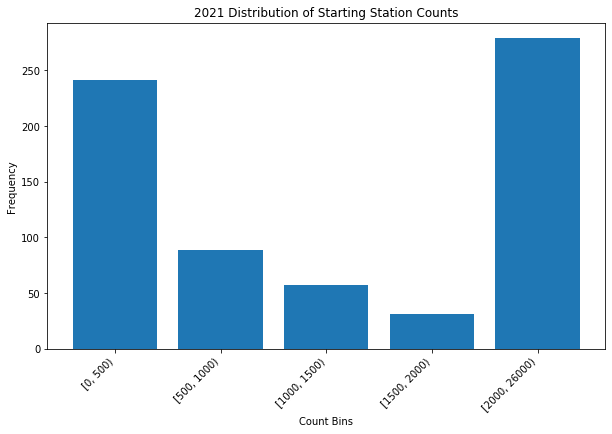

In [68]:
# Define the count bins as integers
bins = [0, 500, 1000, 1500, 2000, 26000]

# Group the counts into bins
count_bins = pd.cut(starting_station_2021_df['Count'], bins=bins, right=False)
count_groups = starting_station_2021_df.groupby(count_bins).size()

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(count_groups.index.astype(str), count_groups.values)

# Customize the x-axis tick labels
ax.set_xticklabels(count_groups.index.astype(str), rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Count Bins')
ax.set_ylabel('Frequency')
ax.set_title('2021 Distribution of Starting Station Counts')

# Show the plot
plt.show()

In [59]:
# Filter rows with count > 10000
starting_station_2021_df_filtered = starting_station_2021_df[starting_station_2021_df['Count'] > 10000]

# Display the filtered DataFrame
starting_station_2021_df_filtered

,Starting Station,Count,Starting Lat,Starting Lng
0,New Hampshire Ave & T St NW,25792,38.895914,-77.026064
1,4th St & Madison Dr NW,22850,38.920387,-77.025672
2,1st & M St NE,22162,38.898457,-77.026103
3,15th & P St NW,21948,38.899984,-76.992725
4,Lincoln Memorial,21002,38.902400,-77.026220
5,Columbus Circle / Union Station,20902,38.932514,-76.992889
6,Jefferson Dr & 14th St SW,19086,38.917200,-77.025900
7,Smithsonian-National Mall / Jefferson Dr & 12t...,17980,38.893028,-77.026013
8,11th & M St NW,17796,38.884323,-77.026010
9,Henry Bacon Dr & Lincoln Memorial Circle NW,17194,38.885908,-76.991476


In [60]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
starting_station_layer = gmaps.symbol_layer(
    starting_station_2021_df_filtered[['Starting Lat', 'Starting Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(starting_station_layer)

# Display the map
fig

Figure(layout=FigureLayout(height='420px'))

# 2021 Ending Station Bar Chart, Data Filtering & Map using Google API

In [67]:
print(ending_station_2021_df.max())
print("_____________________________________")
print(ending_station_2021_df.min())

Ending Station    Yuma St & Tenley Circle NW
Count                                  26128
Ending Lat                           39.1258
Ending Lng                          -76.8255
dtype: object
_____________________________________
Ending Station    10th & E St NW
Count                          4
Ending Lat               38.7826
Ending Lng              -77.3684
dtype: object


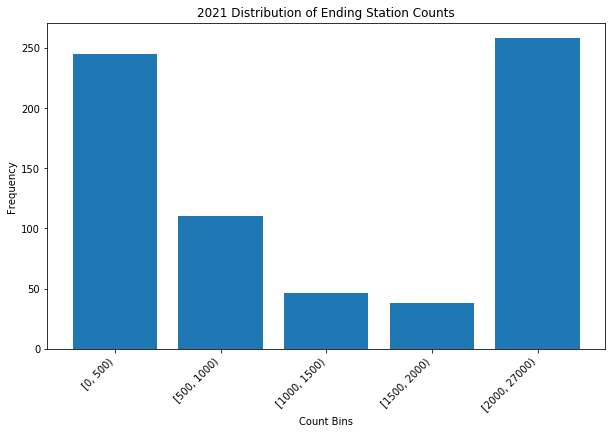

In [74]:
# Define the count bins as integers
bins = [0, 500, 1000, 1500, 2000, 27000]

# Group the counts into bins
count_bins = pd.cut(ending_station_2021_df['Count'], bins=bins, right=False)
count_groups = ending_station_2021_df.groupby(count_bins).size()

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(count_groups.index.astype(str), count_groups.values)

# Customize the x-axis tick labels
ax.set_xticklabels(count_groups.index.astype(str), rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Count Bins')
ax.set_ylabel('Frequency')
ax.set_title('2021 Distribution of Ending Station Counts')

# Show the plot
plt.show()

In [75]:
# Filter rows with count > 10000
ending_station_2021_df_filtered = ending_station_2021_df[ending_station_2021_df['Count'] > 10000]

# Display the filtered DataFrame
ending_station_2021_df_filtered

,Ending Station,Count,Ending Lat,Ending Lng
0,Columbus Circle / Union Station,26128,38.895914,-77.026064
1,New Hampshire Ave & T St NW,24002,38.920387,-77.025672
2,15th & P St NW,23608,38.898243,-77.026235
3,4th St & Madison Dr NW,23366,38.899839,-76.992643
4,1st & M St NE,21540,38.902400,-77.026220
5,Jefferson Dr & 14th St SW,21268,38.932457,-76.993534
6,Lincoln Memorial,20736,38.917200,-77.025900
7,Massachusetts Ave & Dupont Circle NW,19178,38.893028,-77.026013
8,Smithsonian-National Mall / Jefferson Dr & 12t...,18444,38.884323,-77.026010
9,23rd & M St NW,18122,38.885908,-76.991476


In [76]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
ending_station_layer = gmaps.symbol_layer(
    ending_station_2021_df_filtered[['Ending Lat', 'Ending Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(ending_station_layer)

# Display the map
fig

Figure(layout=FigureLayout(height='420px'))

# Starting Station 2022 Bar Chart, Data Filtering & Map with Google API

In [62]:
print(starting_station_2022_df.max())
print("_____________________________________")
print(starting_station_2022_df.min())

Starting Station    Yuma St & Tenley Circle NW
Count                                    18792
Starting Lat                           39.1258
Starting Lng                          -76.8255
dtype: object
_____________________________________
Starting Station    10th & E St NW
Count                            1
Starting Lat               38.7826
Starting Lng              -77.3684
dtype: object


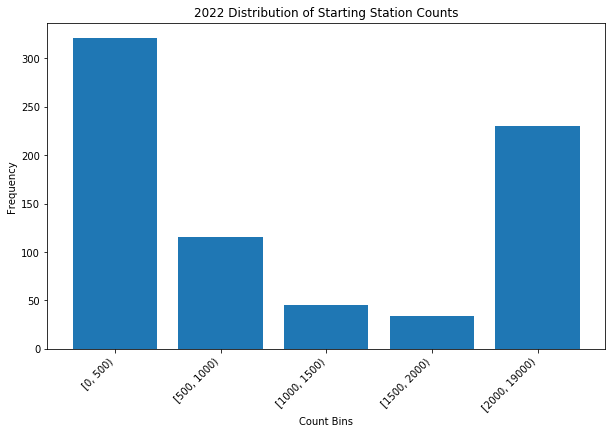

In [77]:
# Define the count bins as integers
bins = [0, 500, 1000, 1500, 2000, 19000]

# Group the counts into bins
count_bins = pd.cut(starting_station_2022_df['Count'], bins=bins, right=False)
count_groups = starting_station_2022_df.groupby(count_bins).size()

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(count_groups.index.astype(str), count_groups.values)

# Customize the x-axis tick labels
ax.set_xticklabels(count_groups.index.astype(str), rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Count Bins')
ax.set_ylabel('Frequency')
ax.set_title('2022 Distribution of Starting Station Counts')

# Show the plot
plt.show()

In [71]:
# Filter rows with count > 10000
starting_station_2022_df_filtered = starting_station_2022_df[starting_station_2022_df['Count'] > 10000]

# Display the filtered DataFrame
starting_station_2022_df_filtered

,Starting Station,Count,Starting Lat,Starting Lng
0,Columbus Circle / Union Station,18792,38.895914,-77.026064
1,New Hampshire Ave & T St NW,16621,38.920479,-77.025661
2,15th & P St NW,14560,38.898243,-77.026235
3,Lincoln Memorial,14222,38.899984,-76.992725
4,Jefferson Dr & 14th St SW,14216,38.902400,-77.026220
5,1st & M St NE,13804,38.932457,-76.993534
6,4th St & Madison Dr NW,12968,38.917200,-77.025900
7,Smithsonian-National Mall / Jefferson Dr & 12t...,12865,38.892823,-77.025803
8,14th & V St NW,11540,38.920387,-77.025672
9,5th & K St NW,10883,38.884323,-77.026010


In [78]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
starting_station_layer = gmaps.symbol_layer(
    starting_station_2022_df_filtered[['Starting Lat', 'Starting Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(starting_station_layer)

# Display the map
fig

Figure(layout=FigureLayout(height='420px'))

# Ending Stations 2022 Bar Chart, Data Filtering, Map with Google API

In [79]:
print(ending_station_2022_df.max())
print("_____________________________________")
print(ending_station_2022_df.min())

Ending Station    Yuma St & Tenley Circle NW
Count                                  23802
Ending Lat                           39.1258
Ending Lng                                 0
dtype: object
_____________________________________
Ending Station    10th & E St NW
Count                          1
Ending Lat                     0
Ending Lng              -77.3684
dtype: object


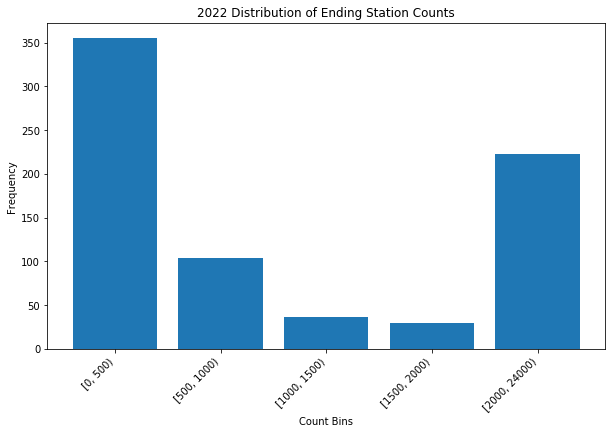

In [80]:
# Define the count bins as integers
bins = [0, 500, 1000, 1500, 2000, 24000]

# Group the counts into bins
count_bins = pd.cut(ending_station_2022_df['Count'], bins=bins, right=False)
count_groups = ending_station_2022_df.groupby(count_bins).size()

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(count_groups.index.astype(str), count_groups.values)

# Customize the x-axis tick labels
ax.set_xticklabels(count_groups.index.astype(str), rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Count Bins')
ax.set_ylabel('Frequency')
ax.set_title('2022 Distribution of Ending Station Counts')

# Show the plot
plt.show()


In [81]:
# Filter rows with count > 10000
ending_station_2022_df_filtered = ending_station_2022_df[ending_station_2022_df['Count'] > 10000]

# Display the filtered DataFrame
ending_station_2022_df_filtered

,Ending Station,Count,Ending Lat,Ending Lng
0,Columbus Circle / Union Station,23802,38.895914,-77.026064
1,Jefferson Dr & 14th St SW,15713,38.920387,-77.025672
2,New Hampshire Ave & T St NW,15574,38.898243,-77.026235
3,15th & P St NW,15267,38.899984,-76.992725
4,Lincoln Memorial,14576,38.902400,-77.026220
5,Smithsonian-National Mall / Jefferson Dr & 12t...,14269,38.932457,-76.993534
6,4th St & Madison Dr NW,13949,38.922489,-76.992670
7,Massachusetts Ave & Dupont Circle NW,13192,38.917200,-77.025900
8,1st & M St NE,12792,38.893028,-77.026013
9,New Jersey Ave & F St NW,12637,38.920387,-77.025672


In [86]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
ending_station_layer = gmaps.symbol_layer(
    ending_station_2022_df_filtered[['Ending Lat', 'Ending Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(ending_station_layer)

# Display the map
fig


Figure(layout=FigureLayout(height='420px'))

Map of Weekdays 6am-6pm 2021 Starting Stations

In [28]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
starting_station_2021_layer = gmaps.symbol_layer(
    starting_station_2021_df[['Starting Lat', 'Starting Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(starting_station_2021_layer)

# Display the map
fig


Figure(layout=FigureLayout(height='420px'))

Map of Weekdays 6am-6pm 2021 Ending Stations



In [21]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
ending_station_2021_layer = gmaps.symbol_layer(
    ending_station_2021_df[['Ending Lat', 'Ending Lng']],
    fill_color='blue',
    stroke_color='blue',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(ending_station_2021_layer)

# Display the map
fig



Figure(layout=FigureLayout(height='420px'))

Map of Weekdays 6am-6pm 2022 Starting Stations

In [24]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
starting_station_2022_layer = gmaps.symbol_layer(
    starting_station_2022_df[['Starting Lat', 'Starting Lng']],
    fill_color='red',
    stroke_color='red',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(starting_station_2022_layer)

# Display the map
fig

Figure(layout=FigureLayout(height='420px'))

Map of Weekdays 6am-6pm 2021 Ending Stations

In [26]:
# Create a map centered at Washington DC
dc_coordinates = (38.9072, -77.0369)
fig = gmaps.figure(center=dc_coordinates, zoom_level=12)

# Create a symbol layer for Starting Stations
ending_station_2022_layer = gmaps.symbol_layer(
    ending_station_2022_df[['Ending Lat', 'Ending Lng']],
    fill_color='blue',
    stroke_color='blue',
    scale=3
)

# Add the Starting Station layer to the map
fig.add_layer(ending_station_2022_layer)

# Display the map
fig


Figure(layout=FigureLayout(height='420px'))